In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [4]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
df.isnull().value_counts()

Alcohol  Malic_Acid  Ash    Ash_Alcanity  Magnesium  Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  Hue    OD280  Proline
False    False       False  False         False      False          False       False                 False            False            False  False  False      178
dtype: int64

array([[<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malic_Acid'}>,
        <Axes: title={'center': 'Ash'}>,
        <Axes: title={'center': 'Ash_Alcanity'}>],
       [<Axes: title={'center': 'Magnesium'}>,
        <Axes: title={'center': 'Total_Phenols'}>,
        <Axes: title={'center': 'Flavanoids'}>,
        <Axes: title={'center': 'Nonflavanoid_Phenols'}>],
       [<Axes: title={'center': 'Proanthocyanins'}>,
        <Axes: title={'center': 'Color_Intensity'}>,
        <Axes: title={'center': 'Hue'}>,
        <Axes: title={'center': 'OD280'}>],
       [<Axes: title={'center': 'Proline'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

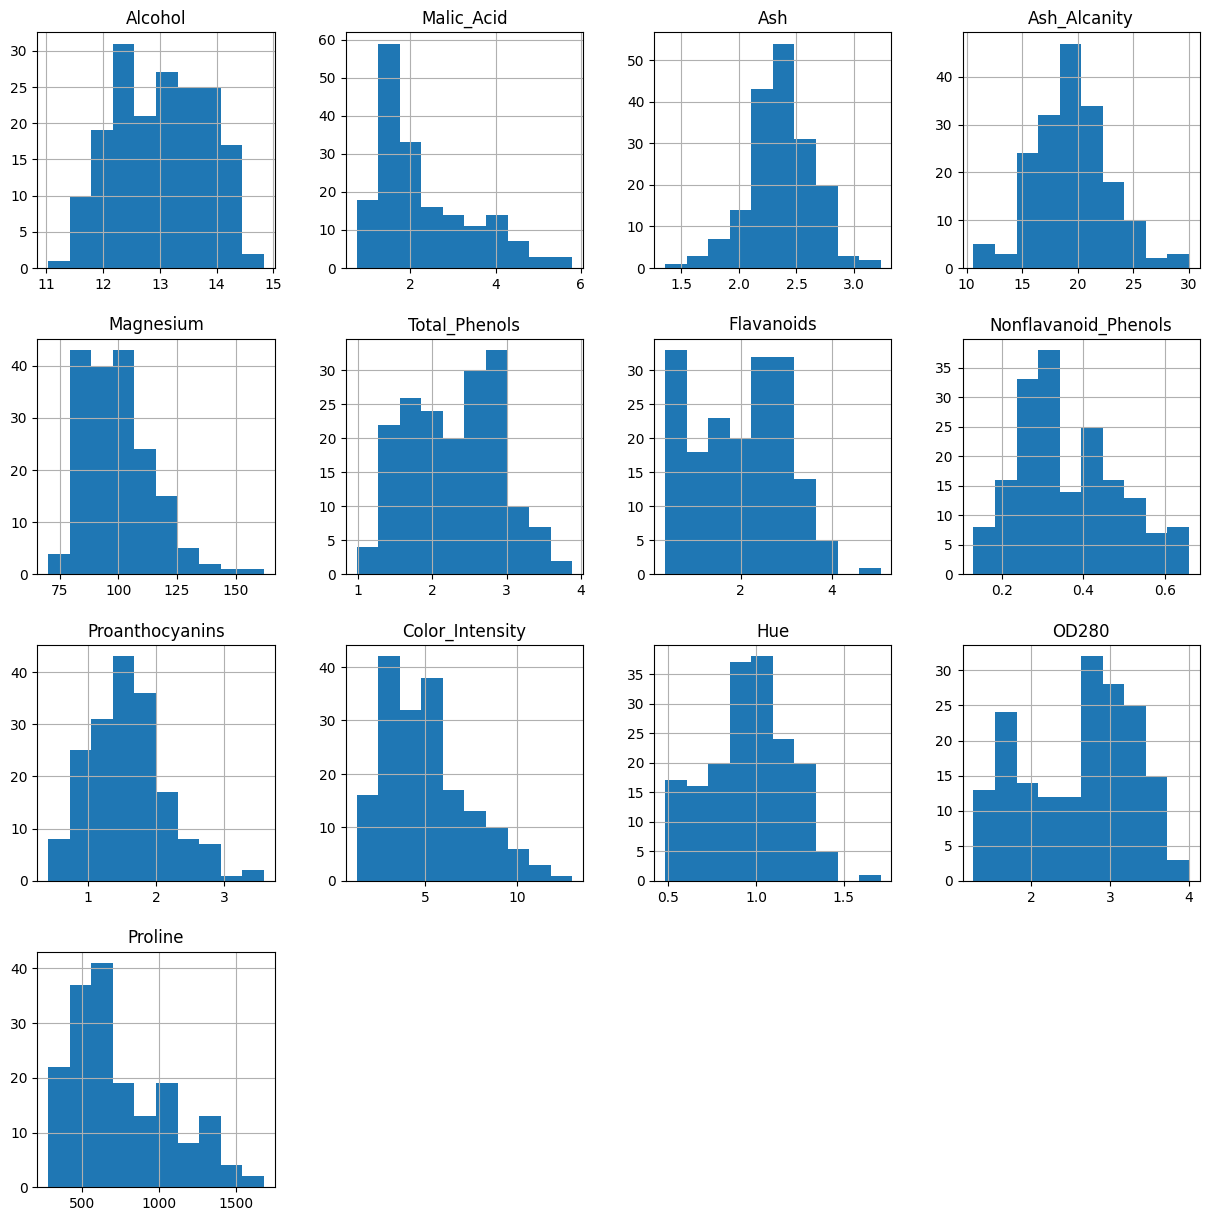

In [6]:
df.hist(figsize=(15,15))

In [7]:
corr_matrix = df.corr().abs()
for column in corr_matrix.columns:
    sorted_corr = corr_matrix[column].sort_values(ascending=False)
    print(f"Korelacija za kolonu: {column}")
    print(sorted_corr)
    print()


Korelacija za kolonu: Alcohol
Alcohol                 1.000000
Proline                 0.643720
Color_Intensity         0.546364
Ash_Alcanity            0.310235
Total_Phenols           0.289101
Magnesium               0.270798
Flavanoids              0.236815
Ash                     0.211545
Nonflavanoid_Phenols    0.155929
Proanthocyanins         0.136698
Malic_Acid              0.094397
OD280                   0.072343
Hue                     0.071747
Name: Alcohol, dtype: float64

Korelacija za kolonu: Malic_Acid
Malic_Acid              1.000000
Hue                     0.561296
Flavanoids              0.411007
OD280                   0.368710
Total_Phenols           0.335167
Nonflavanoid_Phenols    0.292977
Ash_Alcanity            0.288500
Color_Intensity         0.248985
Proanthocyanins         0.220746
Proline                 0.192011
Ash                     0.164045
Alcohol                 0.094397
Magnesium               0.054575
Name: Malic_Acid, dtype: float64

Korelacija za 

<Axes: >

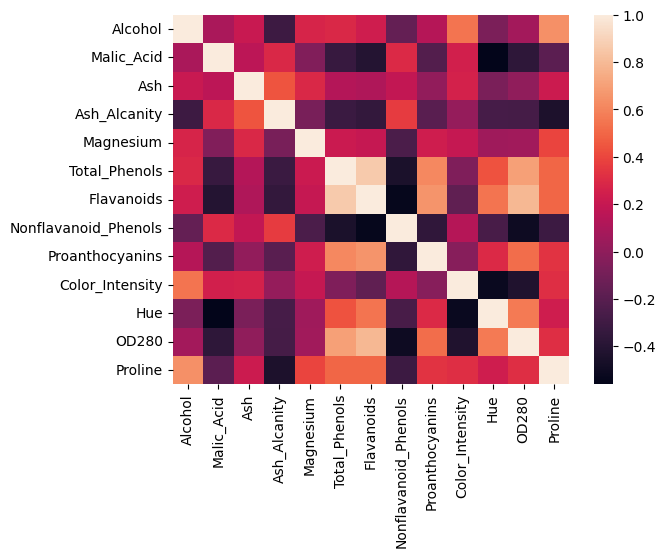

In [8]:
sns.heatmap(df.corr())

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/clust

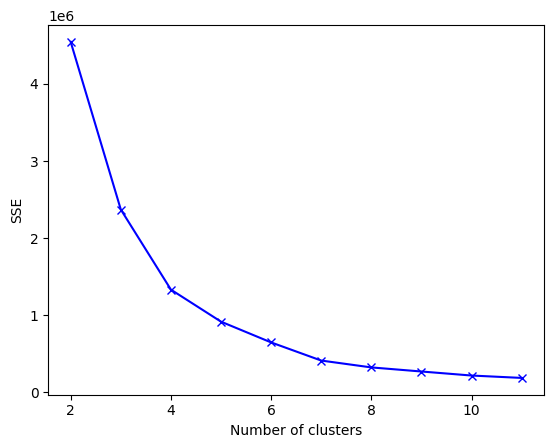

In [9]:
n_clusters_range = range(2, 12)
sse = []
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

plt.plot(n_clusters_range, sse, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/clust

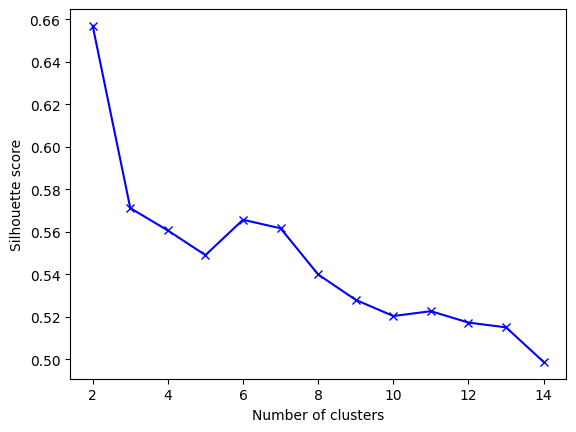

In [10]:
n_clusters_range = range(2, 15)
silhouette_scores = []
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(df, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(n_clusters_range, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

Sillhouete skor se kreće između 1 i -1.

Skor bliži 1 označava da je klaster dobro definisan, 

dok skor bliži -1 označava da su podaci vjerovatno u pogrešnim klasterima.

Koristeći sillhouete skor takođe možemo optimalan broj klastera staviti na 6.


In [11]:
from sklearn.decomposition import PCA
pca = PCA(2)
reduced_features = pca.fit_transform(df)

U cilju jednostavnog vizuelnog prikaza podataka smanjuje se dimenzionalnost podataka koristeći Principal Component Analysis (PCA).

U ovom slučaju će PCA postojeće 13 kolona razložiti na dvije kolone.

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


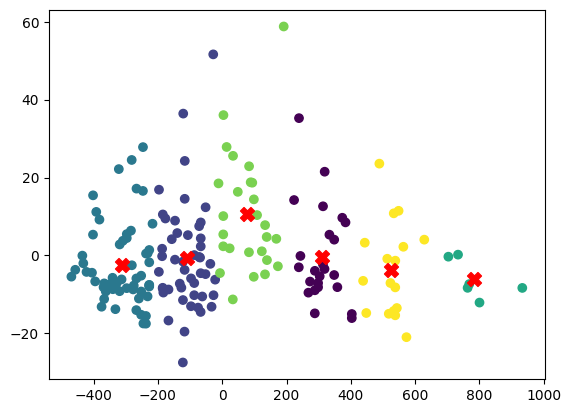

In [12]:
kmeans = KMeans(6)
kmeans.fit(df)
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=kmeans.labels_)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1], marker='X', color='red', s=100)
plt.show()

Na grafiku su prikazani podaci razloženi na dvije dimenzije koristeći PCA u različitim bojama, zavisno od klastera kojem pripadaju.

Takođe su prikazani i centroidi, odnosno centralne tačke klastera.